<a href="https://colab.research.google.com/github/TareFaith/Datascience-Assesment_RTV/blob/main/FAITH_TAREMWA_DATA_SCIENTIST_ANSWERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raising the Village (RTV) works with last-mile communities to lift them out of ultra-poverty through a
24-month agricultural intervention program. Progress among households (HHs) varies significantly, with
some advancing quickly while others struggle. RTV is now seeking to develop a data driven system that
identifies early indicators of struggle among households, allowing for timely interventions. The system
must be robust, scalable, and able to integrate seamlessly with RTV’s existing infrastructure.


Objective:
Develop a scalable, interpretable machine learning model that predicts the likelihood of household
struggle. Deploy this model as part of an integrated system, including an inference API, a data processing
pipeline, model development pipeline, inference pipeline and continuous monitoring. The final solution
should not only predict outcomes but also provide actionable insights and support real-time data-driven
decision-making.

Code: Submit a Jupyter Notebook or Python scripts, ensuring the code is clean, modular, and
adheres to SOLID and DRY principles. Include a README with instructions.
- Version Control: Submit the assessment via a GitHub repository link with a clear commit history.
- Report: Provide a summary report (1-2 pages) detailing your approach, model interpretability,
and deployment strategy.

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
from google.colab import files
uploaded = files.upload()

Saving DataScientist_01_Assessment.csv to DataScientist_01_Assessment (1).csv


In [33]:
file_path = ("DataScientist_01_Assessment.csv")
df = pd.read_csv(file_path)

In [34]:
df.head()

District    Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere   Kangyeyo  KAN-KAN-FER-K1768              3         60   
1  Kanungu    Kihanda  Omurwambu  KAN-OMU-KAN-K4711              3        120   
2  Kanungu   Bujengwe     Byumba  KAN-BYU-ANN-K4055              2         40   
3  Kanungu   Bujengwe     Byumba  KAN-BYU-YUS-K4026              8         15   
4  Kanungu   Bujengwe     Kazahi  KAN-KAZ-FAU-K2057              5        120   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0             0.25                    0                    6   
1         10.0             1.00                    2                    3   
2         10.0              NaN                    3                    3   
3         40.0             1.00                    2                    4   
4         51.0             1.00                    2                    2   

   ...  swept_compound  dish_rack_present  composts  \
0  ...               0                  1       0.0   
1  ...               1                  1       1.0   
2  ...               1                  0       0.0   
3  ...               1                  1       1.0   
4  ...               0                  1       0.0   

   non_bio_waste_mgt_present  apply_liquid_manure  \
0                          0                    0   
1                          1                    0   
2                          1                    0   
3                          1                    1   
4                          1                    1   

   organic_pesticide_expenditure  water_control_practise  soil_management  \
0                            NaN                       1                1   
1                            NaN                       1                1   
2                            NaN                       1                1   
3                            NaN                       1                1   
4                            NaN                       1                1   

   food_banana_wilt_diseases  postharvest_food_storage  
0                        NaN                         1  
1                          2                         0  
2                        1 2                         1  
3                          2                         1  
4                        NaN                         1  

[5 rows x 75 columns]

In [35]:
df.describe()

HouseholdSize    TimeToOPD  TimeToWater  AgricultureLand  \
count    3897.000000  3897.000000  3897.000000      3834.000000   
mean        4.840903    65.277906    33.443318         1.583627   
std         2.165826    55.903550    31.734144         1.923591   
min         1.000000     0.000000     0.001000         0.000000   
25%         3.000000    30.000000    15.000000         0.800000   
50%         5.000000    50.000000    30.000000         1.000000   
75%         6.000000    80.000000    40.000000         2.000000   
max        27.000000   500.000000   360.000000        90.000000   

       Season1CropsPlanted  Season2CropsPlanted  PerennialCropsGrown  \
count          3897.000000          3897.000000          3897.000000   
mean              2.916346             2.648961             2.906082   
std               1.271704             1.450570             1.821869   
min               0.000000             0.000000             0.000000   
25%               2.000000             2.000000             2.000000   
50%               3.000000             3.000000             3.000000   
75%               4.000000             4.000000             4.000000   
max               8.000000             9.000000            11.000000   

       VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  ...  \
count  3.897000e+03     3897.000000             3897.000000  ...   
mean   2.201224e+04        4.931965                7.661235  ...   
std    6.780809e+04       15.192780               29.029623  ...   
min    0.000000e+00        0.000000                0.000000  ...   
25%    0.000000e+00        0.000000                0.000000  ...   
50%    0.000000e+00        0.000000                0.000000  ...   
75%    0.000000e+00        0.000000                2.240556  ...   
max    1.500000e+06      336.083333              672.166667  ...   

       bathroom_constructed  swept_compound  dish_rack_present     composts  \
count           3897.000000     3897.000000        3897.000000  3897.000000   
mean               0.779317        0.856043           0.791635     0.655761   
std                0.414760        0.351091           0.406192     0.458480   
min                0.000000        0.000000           0.000000     0.000000   
25%                1.000000        1.000000           1.000000     0.000000   
50%                1.000000        1.000000           1.000000     1.000000   
75%                1.000000        1.000000           1.000000     1.000000   
max                1.000000        1.000000           1.000000     1.000000   

       non_bio_waste_mgt_present  apply_liquid_manure  \
count                3897.000000          3897.000000   
mean                    0.677188             0.207596   
std                     0.467612             0.405638   
min                     0.000000             0.000000   
25%                     0.000000             0.000000   
50%                     1.000000             0.000000   
75%                     1.000000             0.000000   
max                     1.000000             1.000000   

       organic_pesticide_expenditure  water_control_practise  soil_management  \
count                     683.000000                  3897.0      3897.000000   
mean                     9478.067350                     1.0         0.993585   
std                     21994.643831                     0.0         0.079848   
min                         0.000000                     1.0         0.000000   
25%                         0.000000                     1.0         1.000000   
50%                         0.000000                     1.0         1.000000   
75%                     10000.000000                     1.0         1.000000   
max                    250000.000000                     1.0         1.000000   

       postharvest_food_storage  
count               3897.000000  
mean                   0.595073  
std                    0.490941  
min                    0.000000  
25%            

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 75 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District                                  3897 non-null   object 
 1   Cluster                                   3897 non-null   object 
 2   Village                                   3897 non-null   object 
 3   HouseHoldID                               3897 non-null   object 
 4   HouseholdSize                             3897 non-null   int64  
 5   TimeToOPD                                 3897 non-null   int64  
 6   TimeToWater                               3897 non-null   float64
 7   AgricultureLand                           3834 non-null   float64
 8   Season1CropsPlanted                       3897 non-null   int64  
 9   Season2CropsPlanted                       3897 non-null   int64  
 10  PerennialCropsGrown                 

In [37]:
df.isnull().sum() # food_banana_wilt_diseases, organic_pesticide_expenditure and  Loan_from have null values. they will be deleted because they have less impact on our target

District                            0
Cluster                             0
Village                             0
HouseHoldID                         0
HouseholdSize                       0
                                 ... 
organic_pesticide_expenditure    3214
water_control_practise              0
soil_management                     0
food_banana_wilt_diseases        1348
postharvest_food_storage            0
Length: 75, dtype: int64

In [38]:
#Fill missing values with mean for numerical columns and mode for categorical columns
df['organic_pesticide_expenditure'].fillna(df['organic_pesticide_expenditure'].mean(), inplace=True)
df['food_banana_wilt_diseases'].fillna(df['food_banana_wilt_diseases'].mode()[0], inplace=True)
df['Loan_from'].fillna(df['Loan_from'].mode(), inplace=True)


In [39]:
df.isnull().sum() #no missing values

District                         0
Cluster                          0
Village                          0
HouseHoldID                      0
HouseholdSize                    0
                                ..
organic_pesticide_expenditure    0
water_control_practise           0
soil_management                  0
food_banana_wilt_diseases        0
postharvest_food_storage         0
Length: 75, dtype: int64

In [40]:
#check duplicates
df.duplicated().sum()

0

In [41]:
#Household size feature and income
df['HouseholdSize_Income'] = df['HouseholdSize'] * df['HouseholdIcome']

In [42]:
# Agricultural and income
df['AgricValue_LivestockIncome'] = df['AgricValue'] * df['LivestockIncome']

In [43]:
df['IncomePerMember'] = df['HouseholdIcome'] / df['HouseholdSize']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District                                  3897 non-null   object 
 1   Cluster                                   3897 non-null   object 
 2   Village                                   3897 non-null   object 
 3   HouseHoldID                               3897 non-null   object 
 4   HouseholdSize                             3897 non-null   int64  
 5   TimeToOPD                                 3897 non-null   int64  
 6   TimeToWater                               3897 non-null   float64
 7   AgricultureLand                           3834 non-null   float64
 8   Season1CropsPlanted                       3897 non-null   int64  
 9   Season2CropsPlanted                       3897 non-null   int64  
 10  PerennialCropsGrown                 

In [48]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

categorical_columns = ['business_number', 'Loan_from', 'food_banana_wilt_diseases']

for column in categorical_columns:
  if column in df.columns:
        df[f'{column}_encoded'] = le.fit_transform(df[column])
        df = df.drop(column, axis=1)

# One-Hot Encoding for categorical columns
encoded_columns = [f'{column}_encoded' for column in categorical_columns]
df = pd.get_dummies(df, columns = encoded_columns, drop_first=True)

# Verify changes
print(df.head())

  District    Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere   Kangyeyo  KAN-KAN-FER-K1768              3         60   
1  Kanungu    Kihanda  Omurwambu  KAN-OMU-KAN-K4711              3        120   
2  Kanungu   Bujengwe     Byumba  KAN-BYU-ANN-K4055              2         40   
3  Kanungu   Bujengwe     Byumba  KAN-BYU-YUS-K4026              8         15   
4  Kanungu   Bujengwe     Kazahi  KAN-KAZ-FAU-K2057              5        120   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0             0.25                    0                    6   
1         10.0             1.00                    2                    3   
2         10.0              NaN                    3                    3   
3         40.0             1.00                    2                    4   
4         51.0             1.00                    2                    2   

   ...  Loan_from_encoded_15  Loan_from_encoded_16

In [51]:
def categorize_status(income):
    if income >= 2.15:
        return 'On Track'
    elif income >= 1.77:
        return 'At Risk'
    elif income >= 1.25:
        return 'Struggling'
    else:
        return 'Severely Struggling'

df['ProgressStatus'] = df['HHIncome+Consumption+Residues/Day'].apply(categorize_status)

In [56]:
df.drop(columns=['District','Cluster','Village','HouseHoldID'], inplace=True)

In [58]:
#Split the dataset
X = df.drop(columns=['ProgressStatus'])
y = df['ProgressStatus']

In [60]:
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

AgricultureLand    63
dtype: int64


In [61]:
X = X.dropna()
y = y[X.index]

In [62]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [64]:
#create test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [66]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

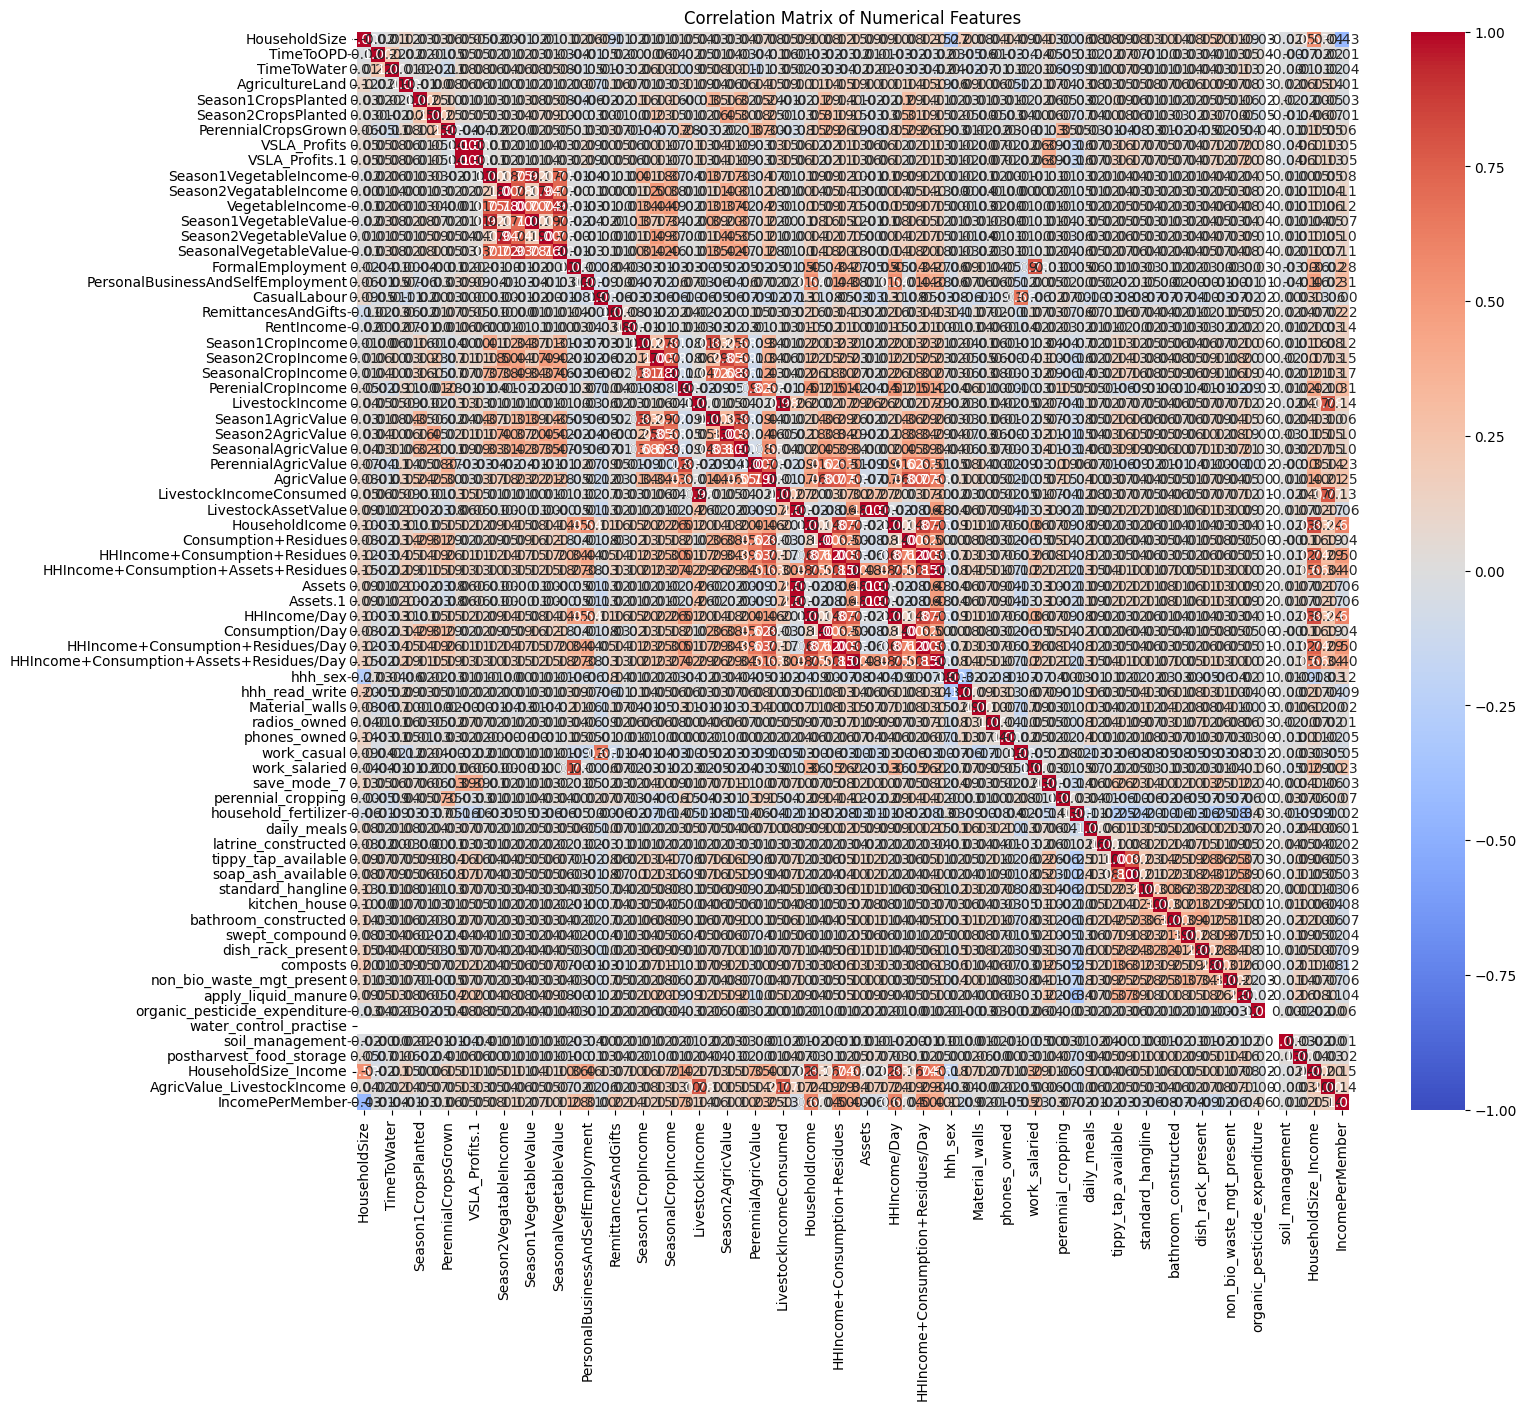

In [71]:
correlation_matrix = X[numerical_features].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

plt.show()
# has manay features a correlation matrix cant help

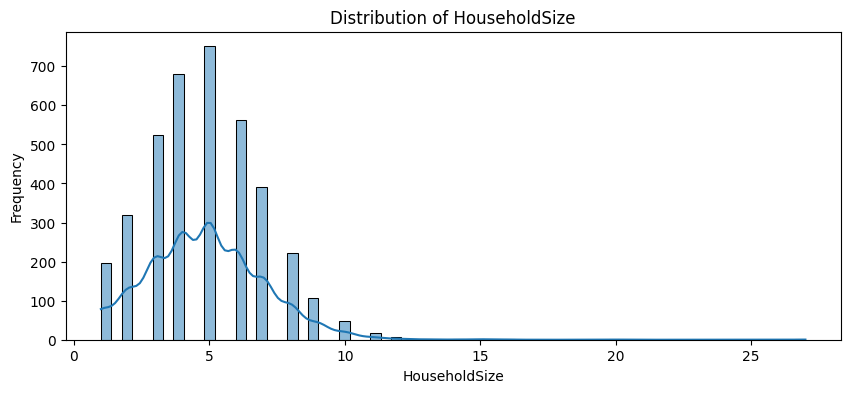

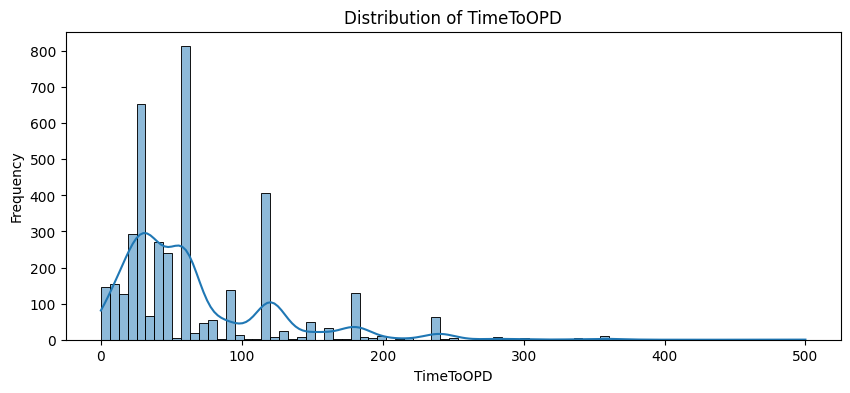

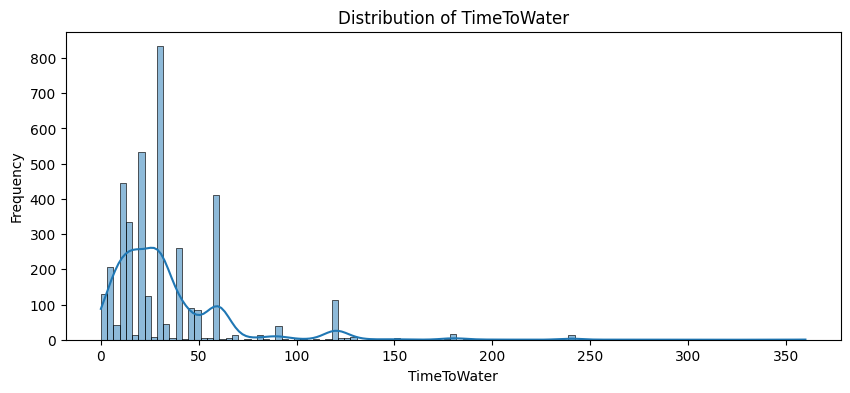

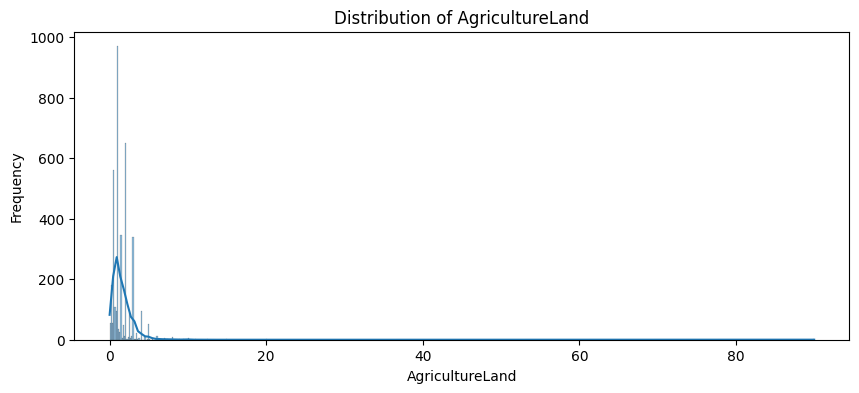

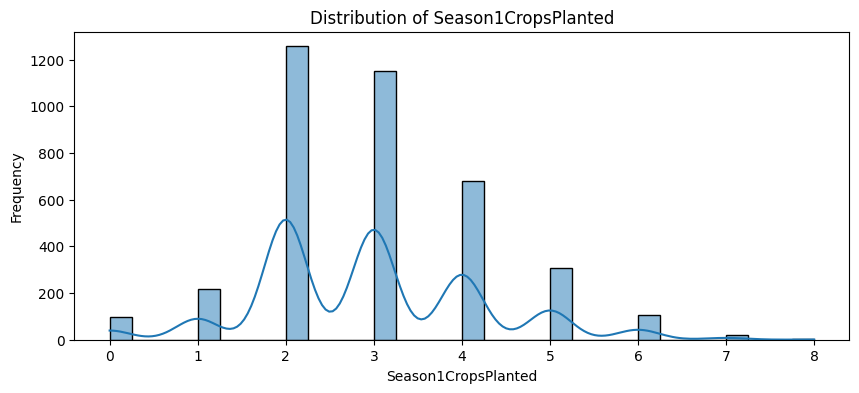

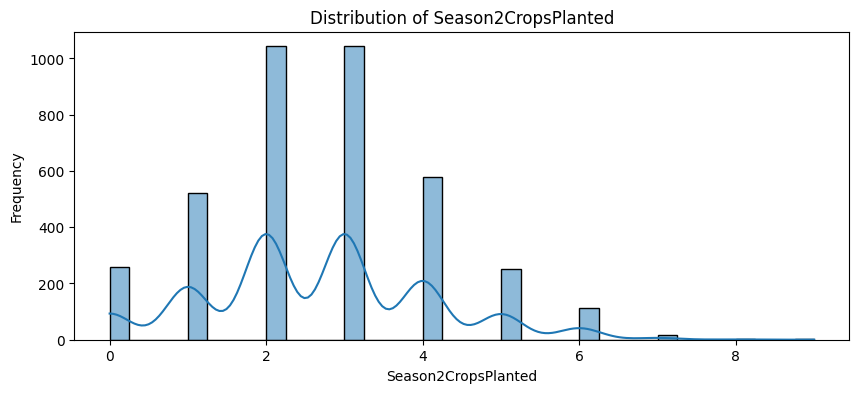

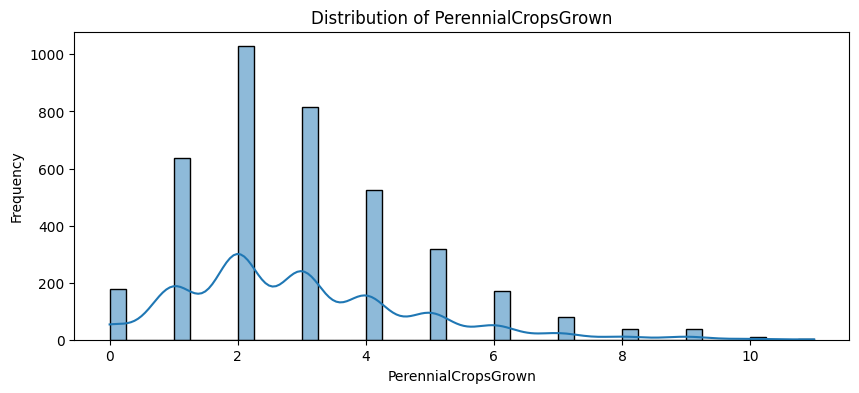

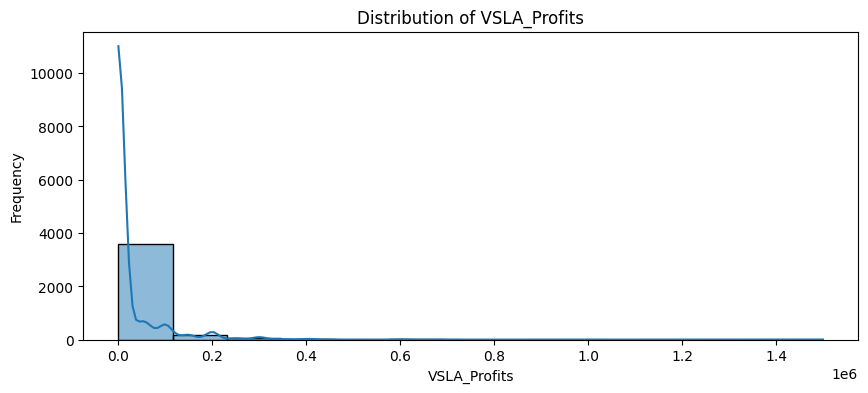

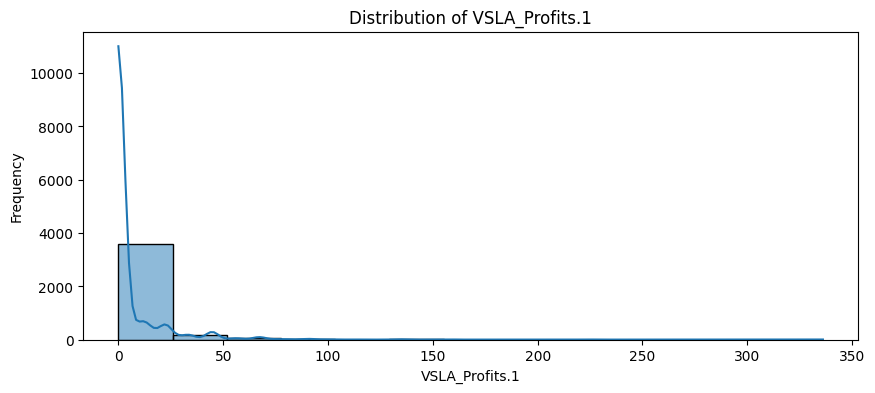

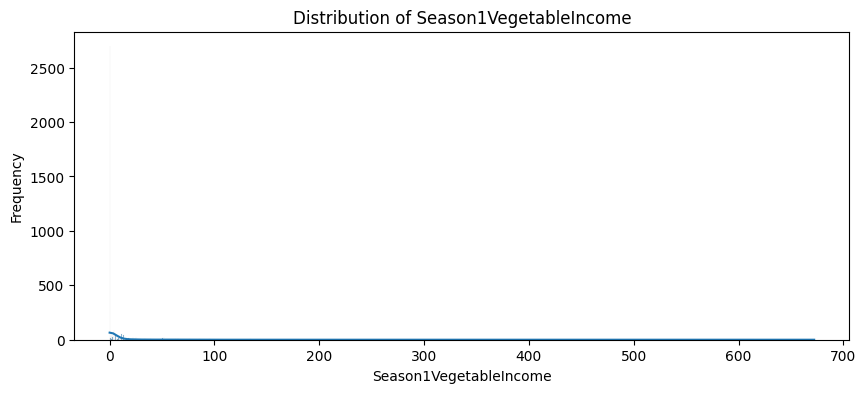

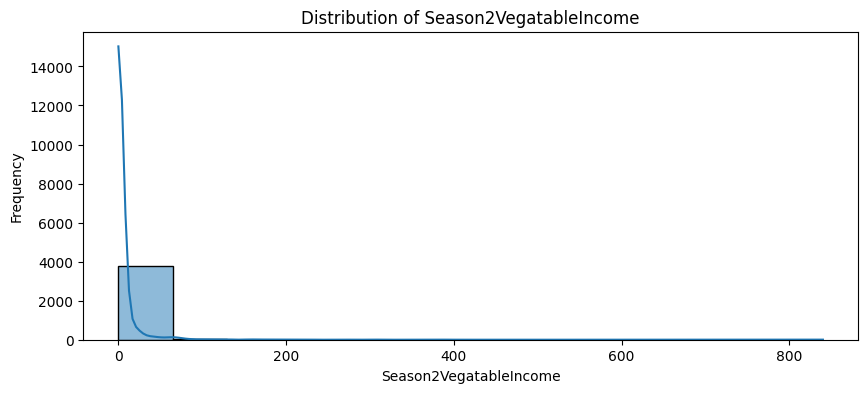

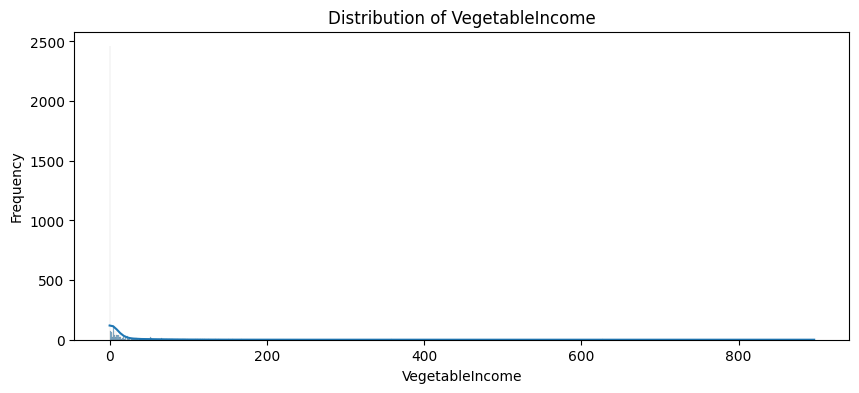

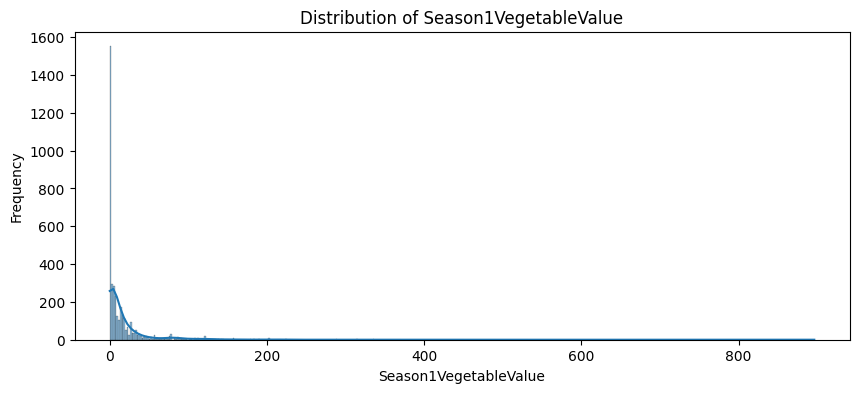

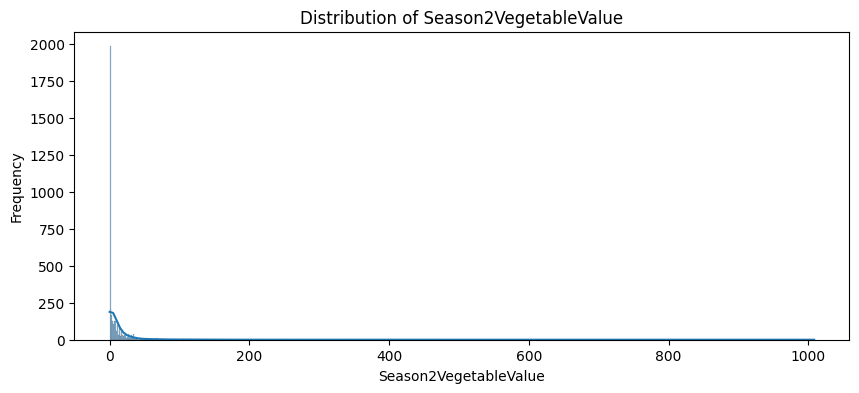

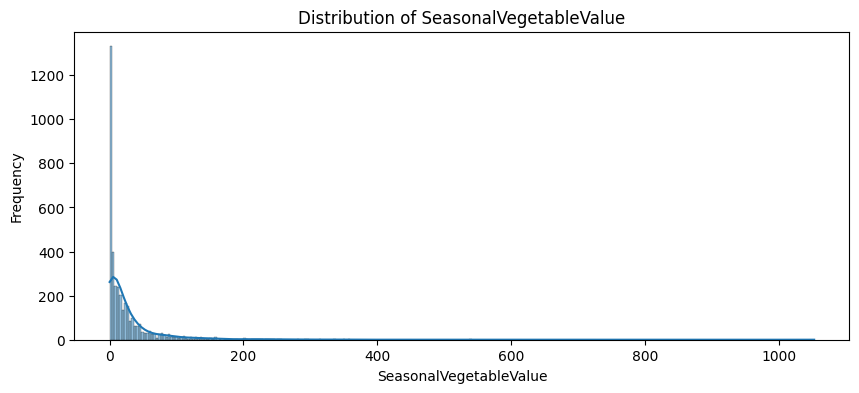

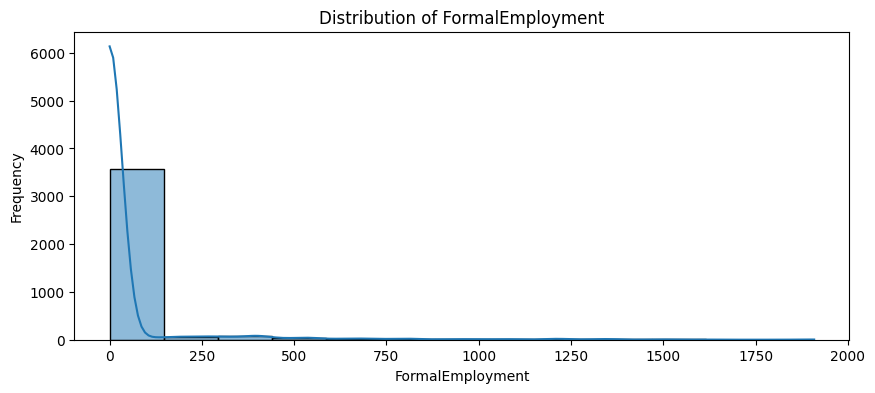

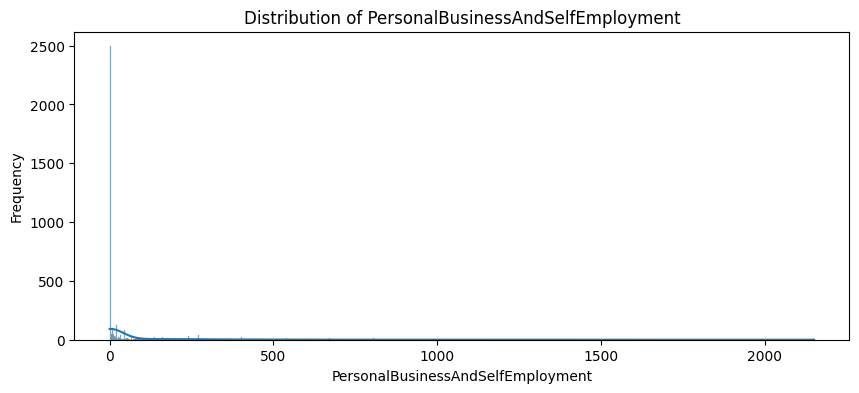

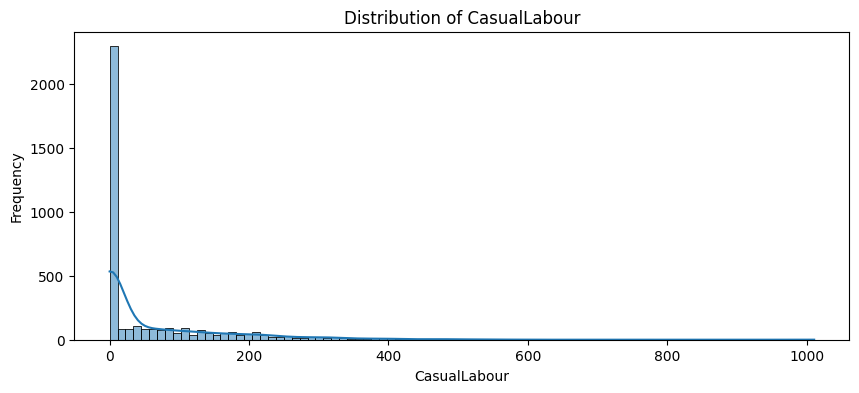

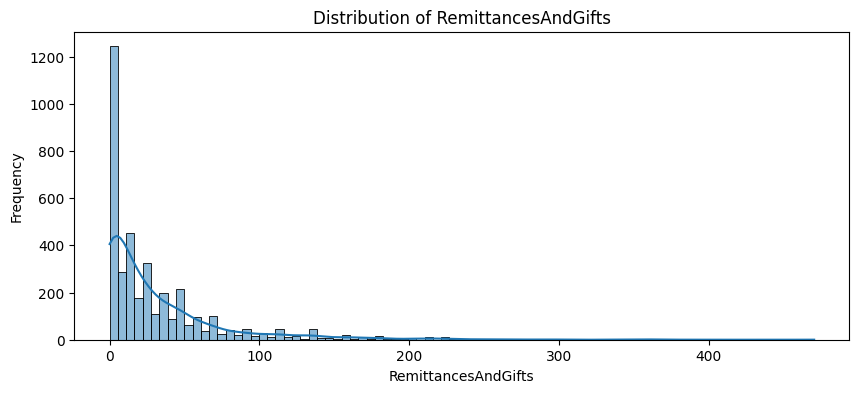

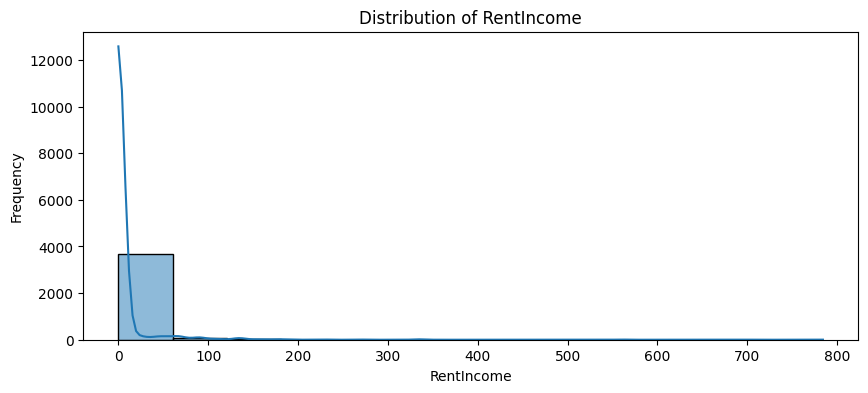

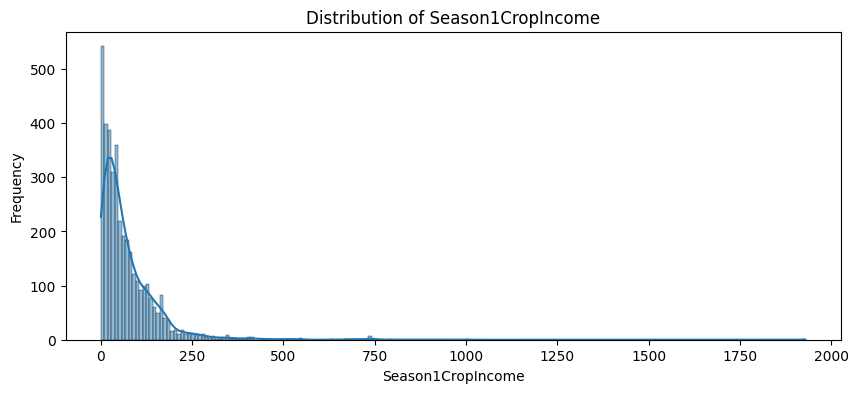

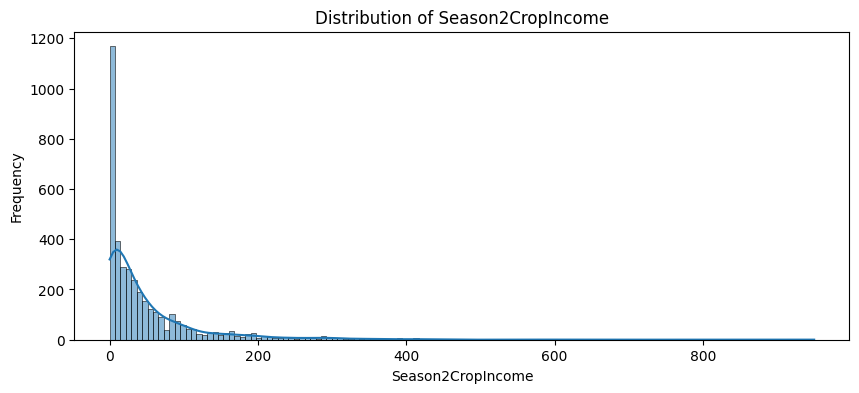

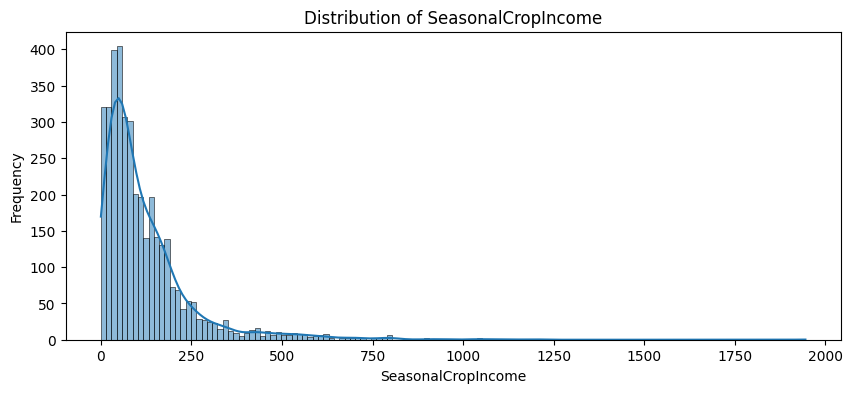

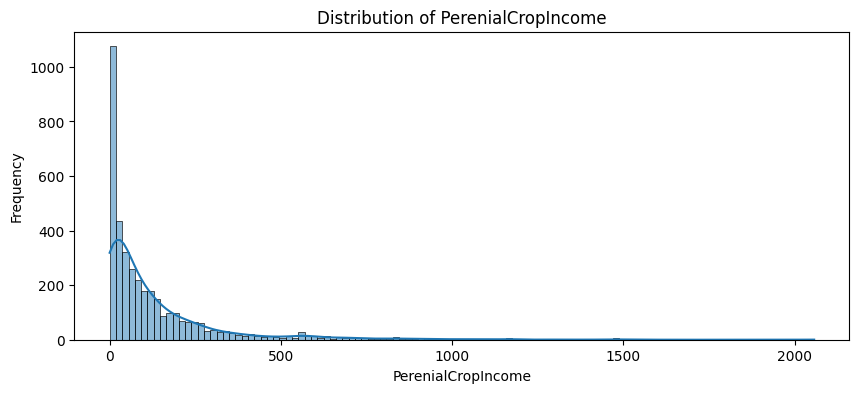

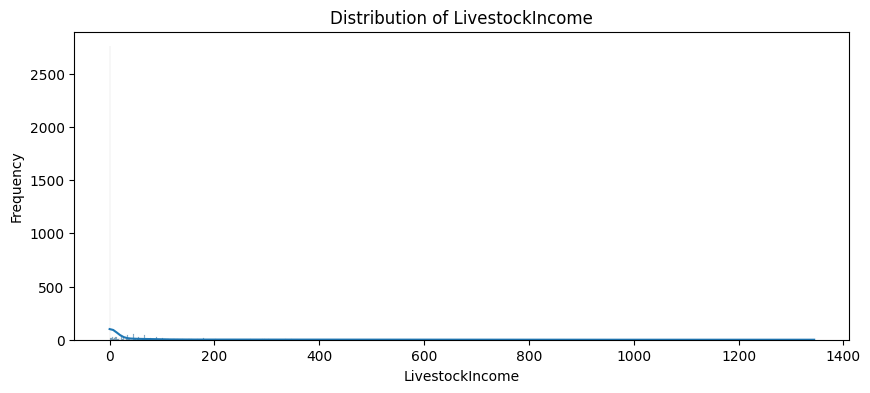

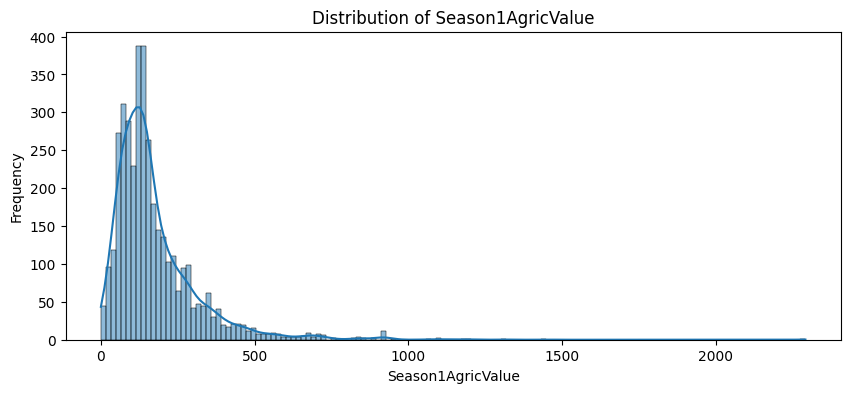

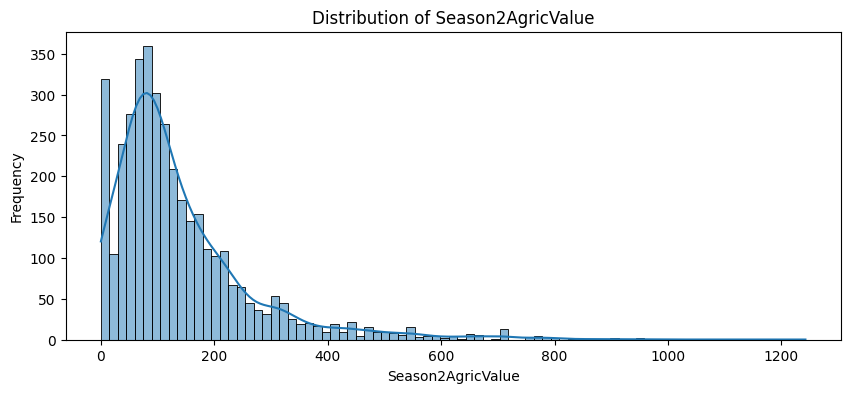

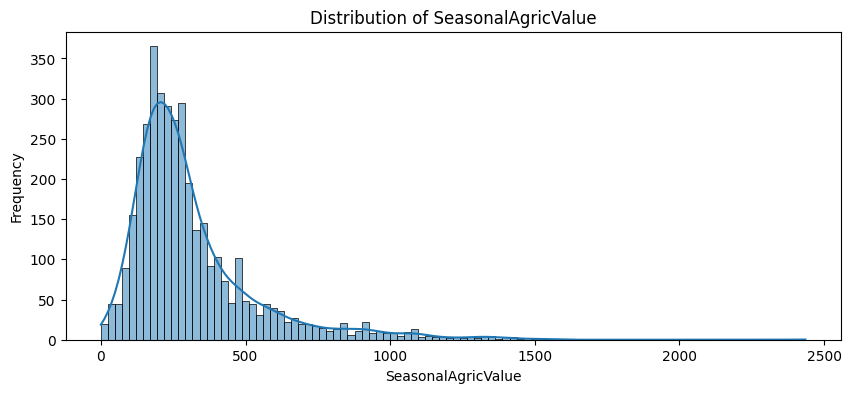

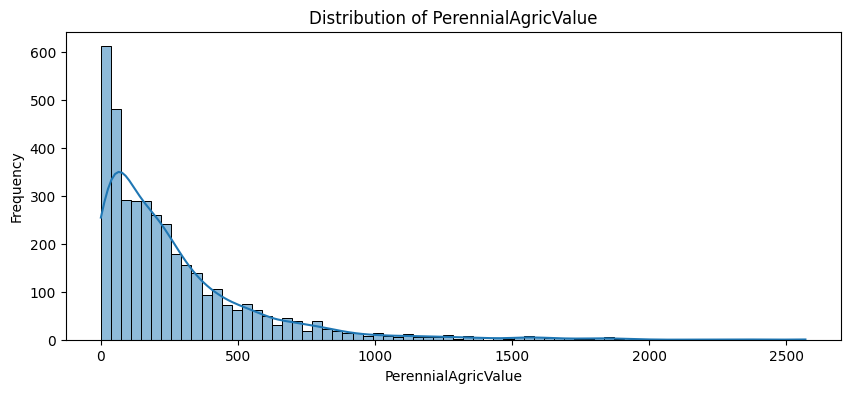

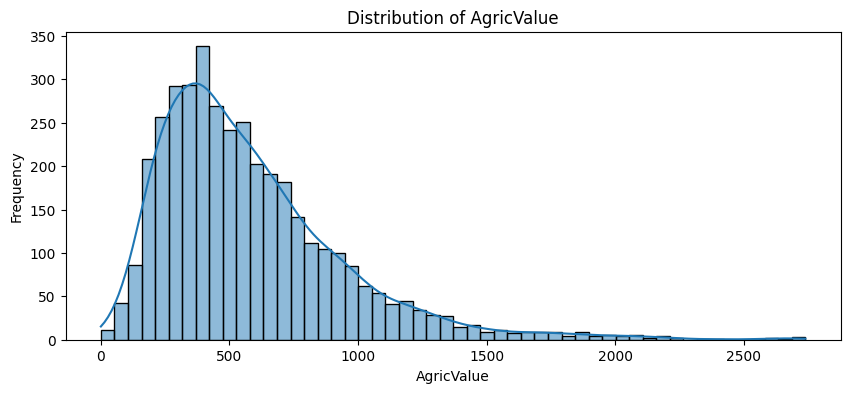

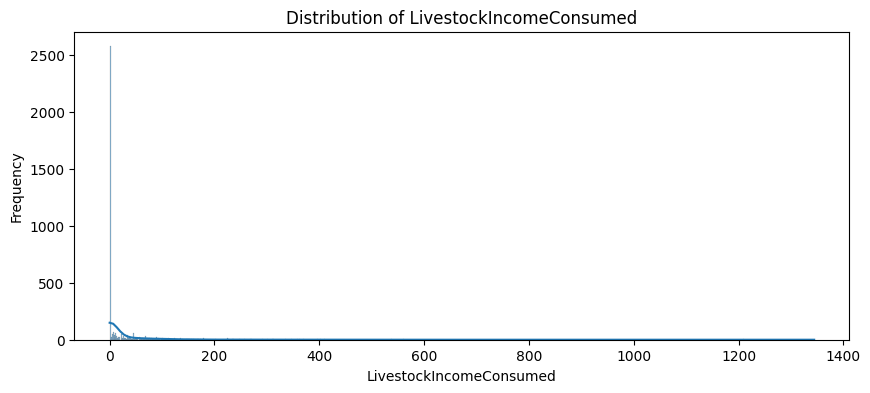

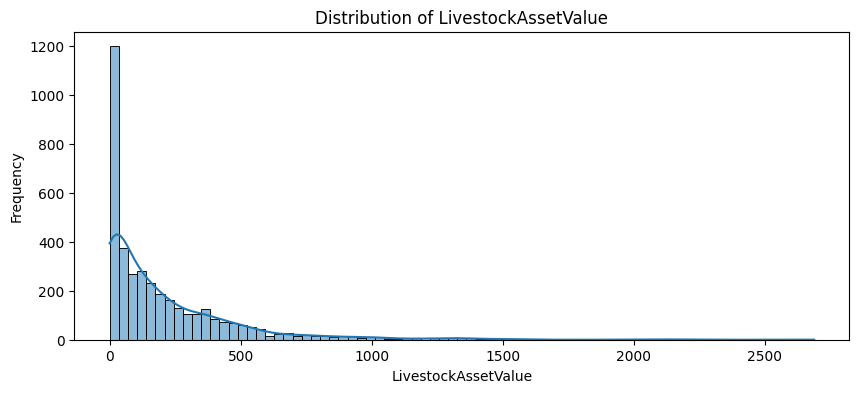

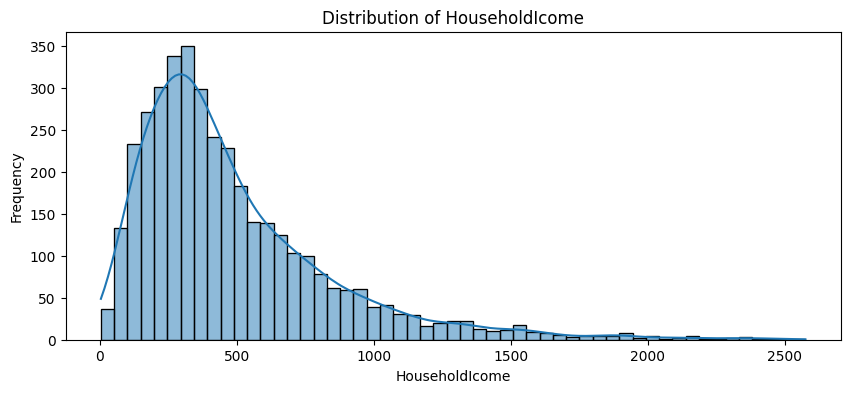

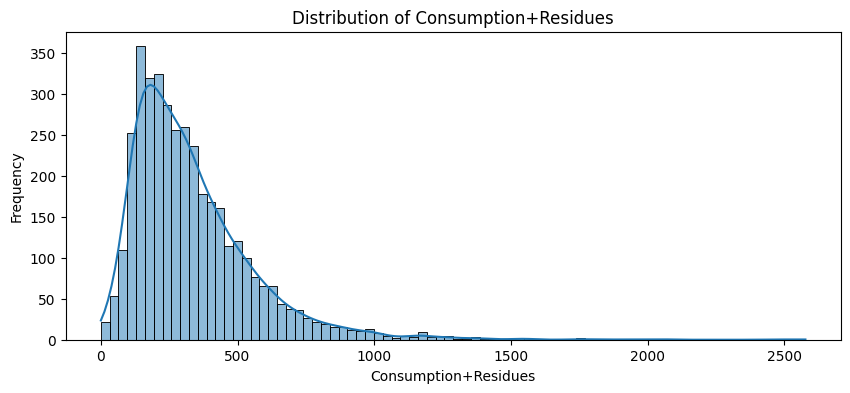

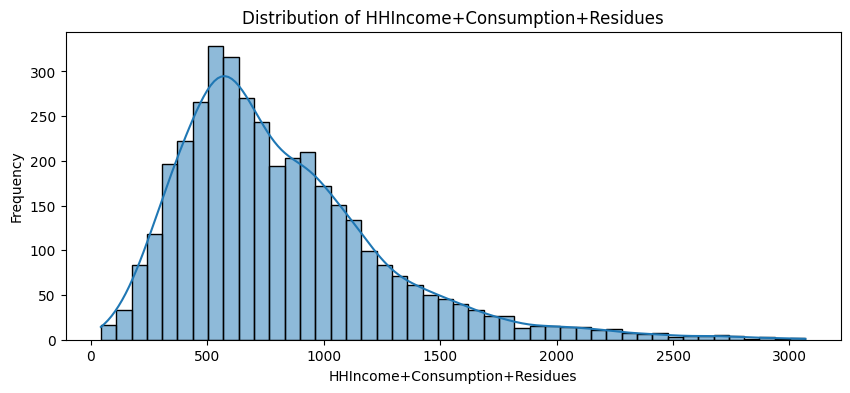

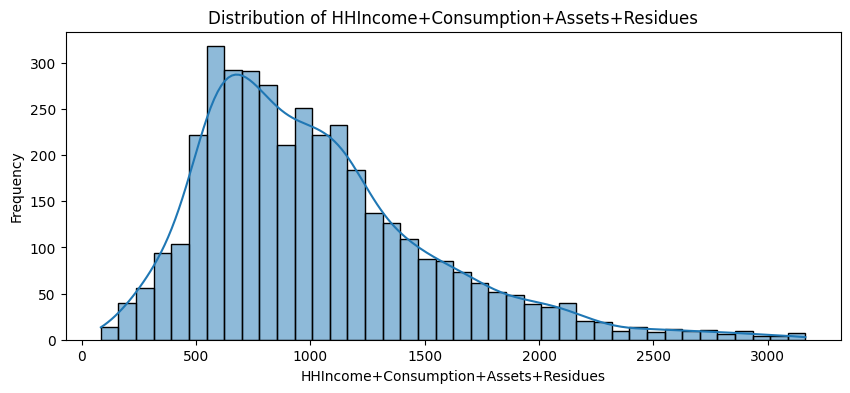

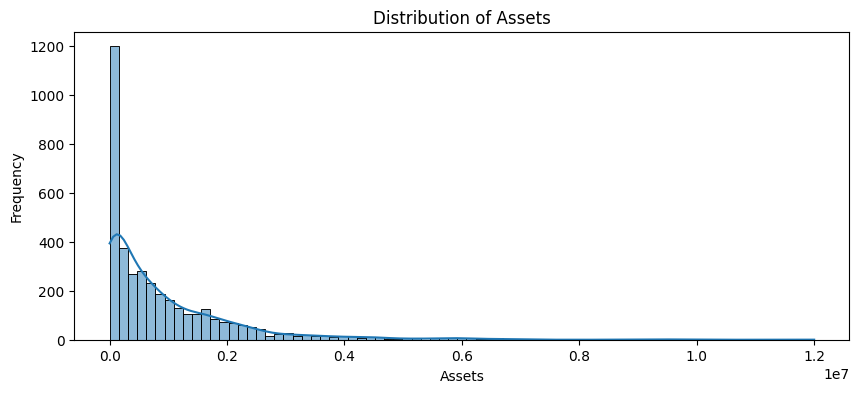

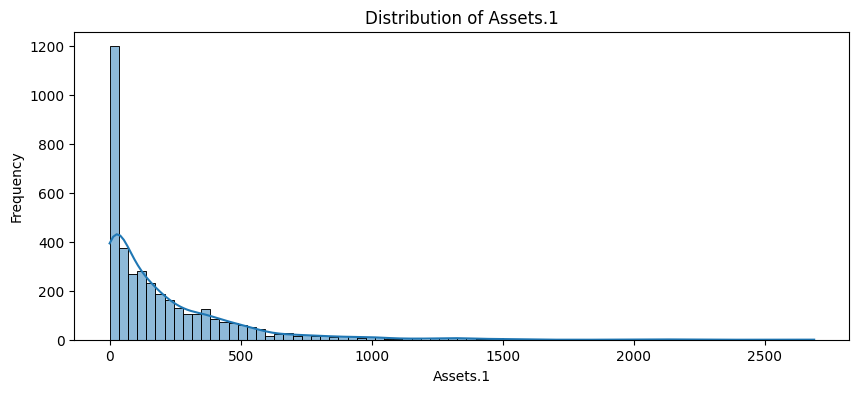

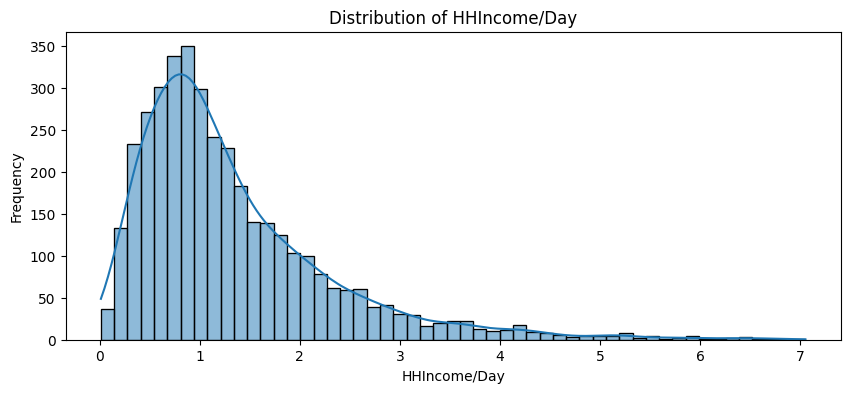

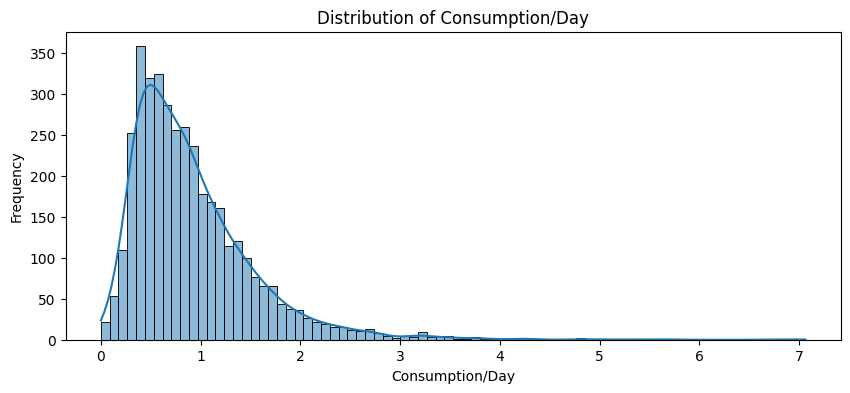

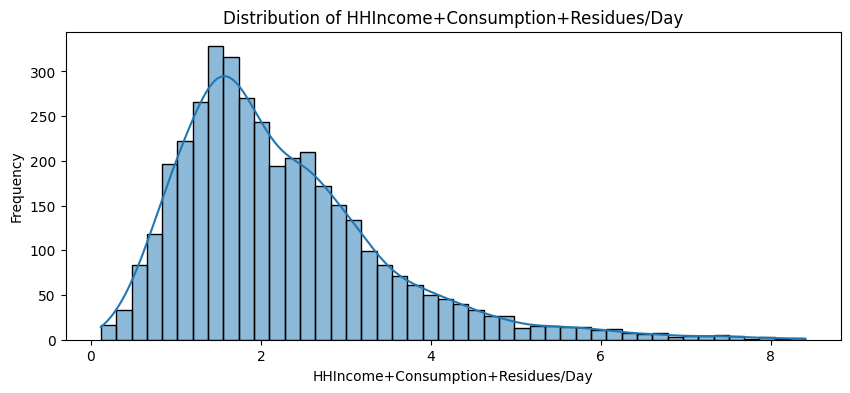

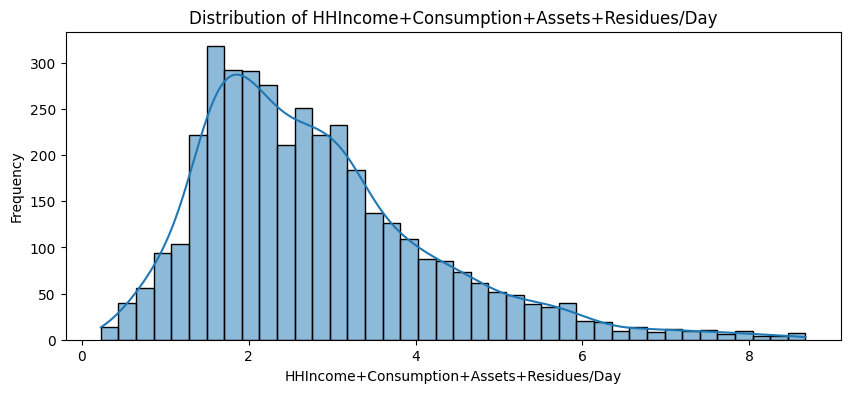

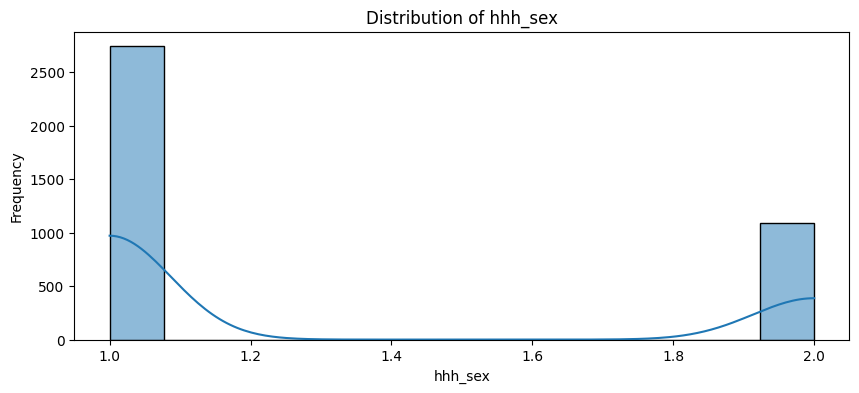

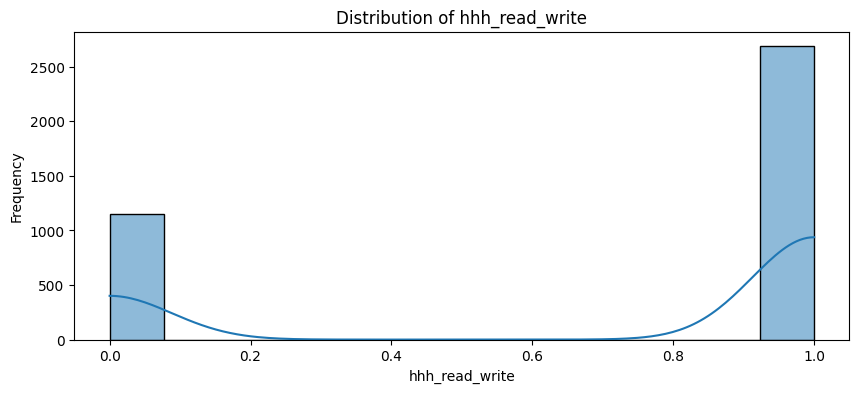

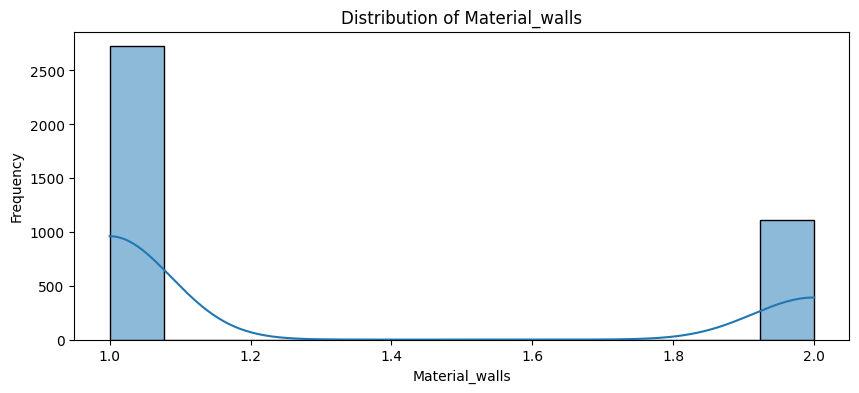

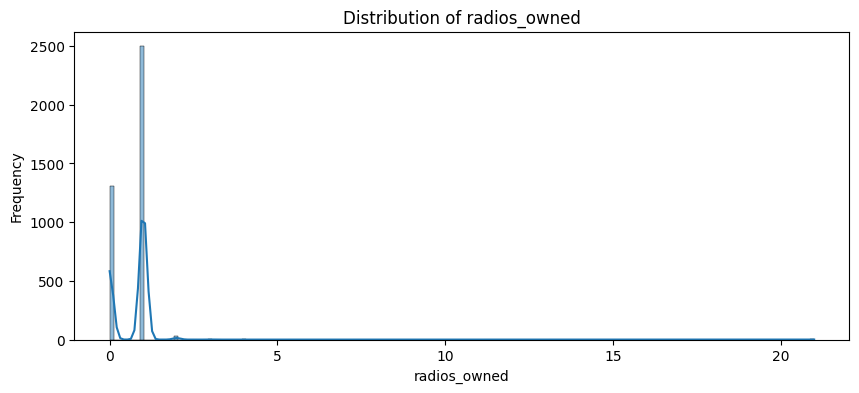

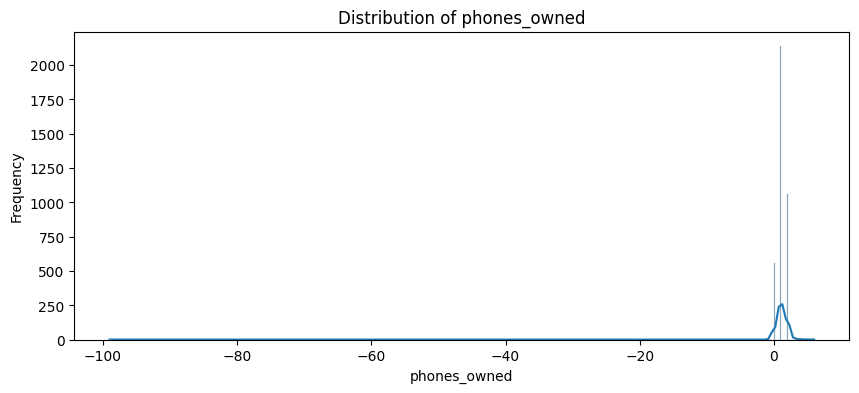

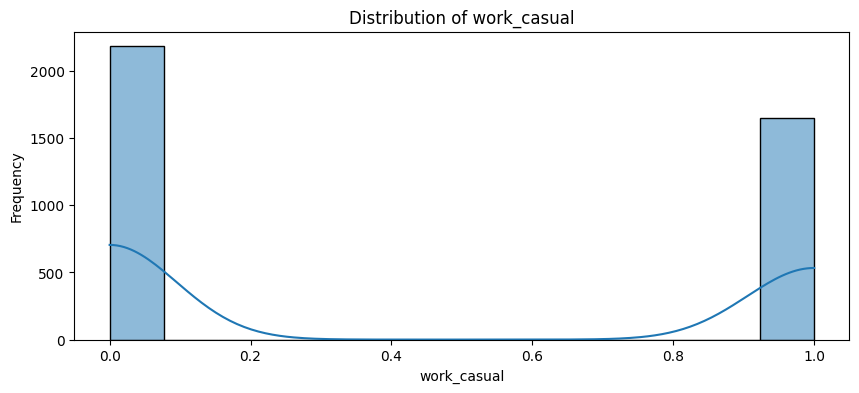

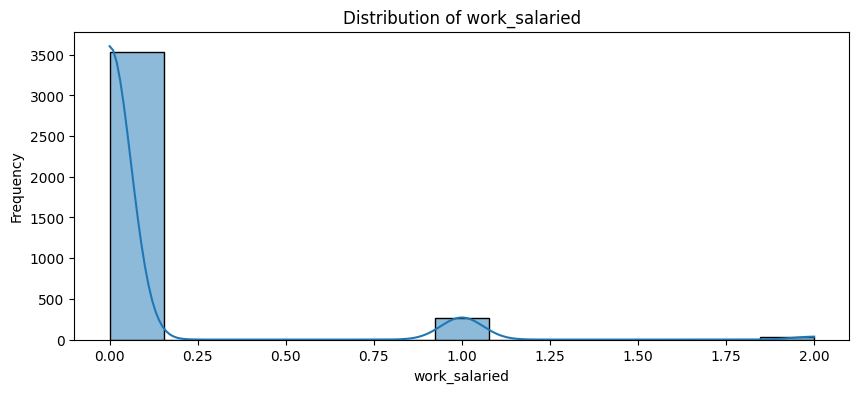

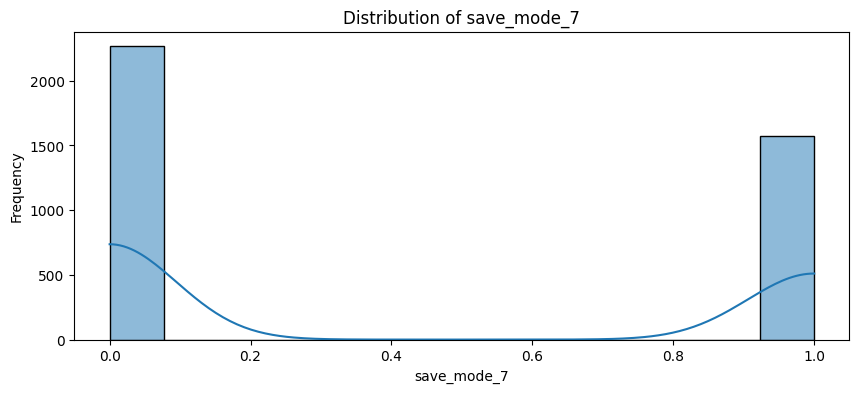

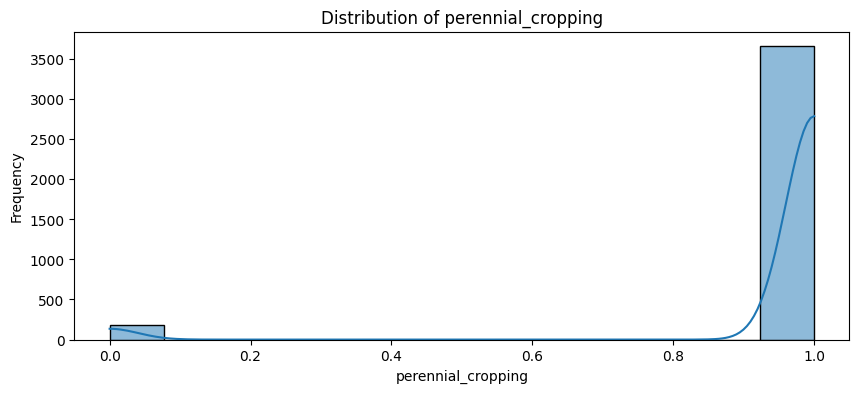

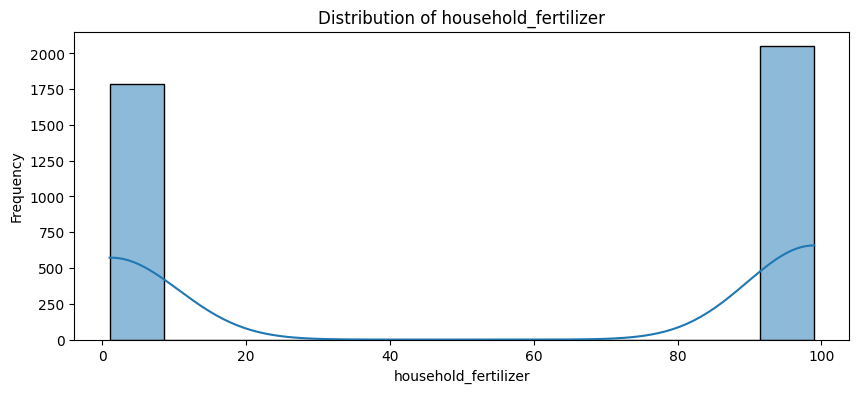

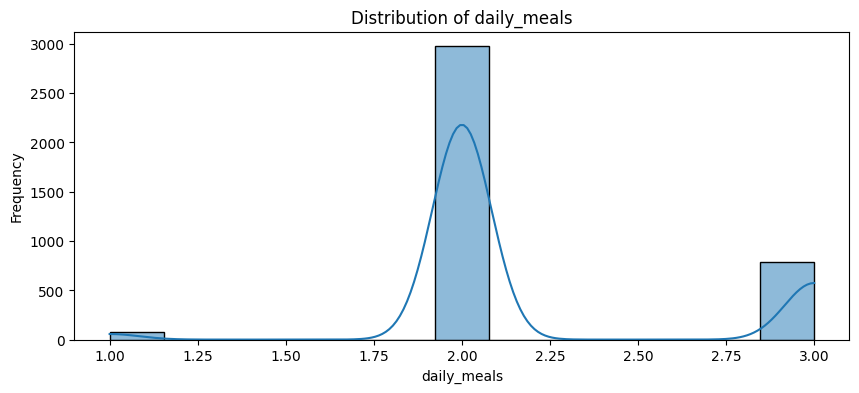

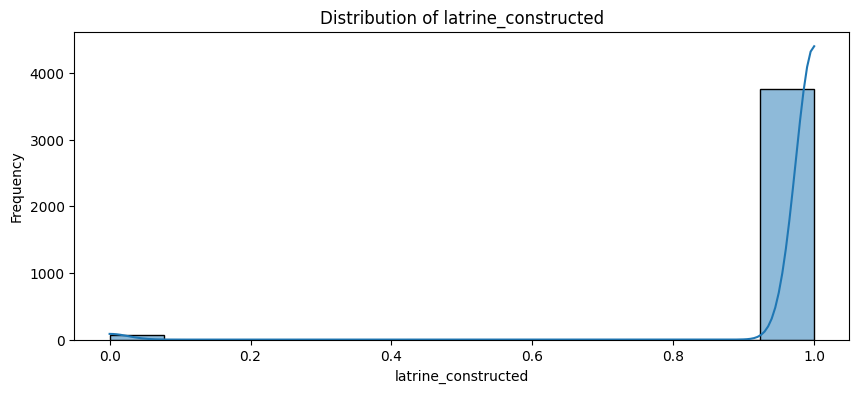

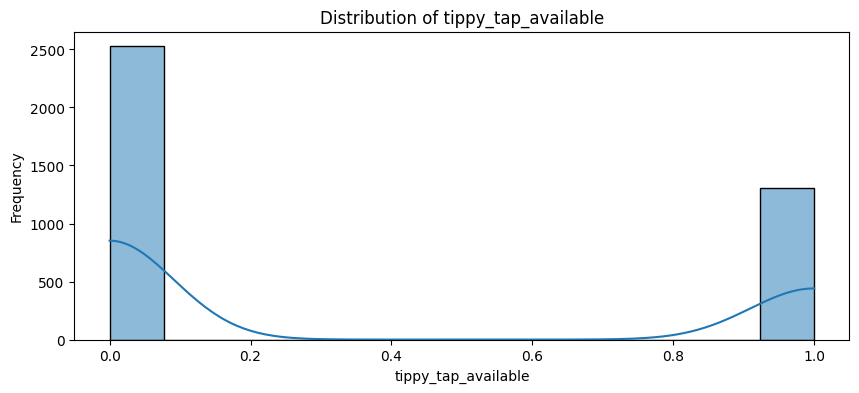

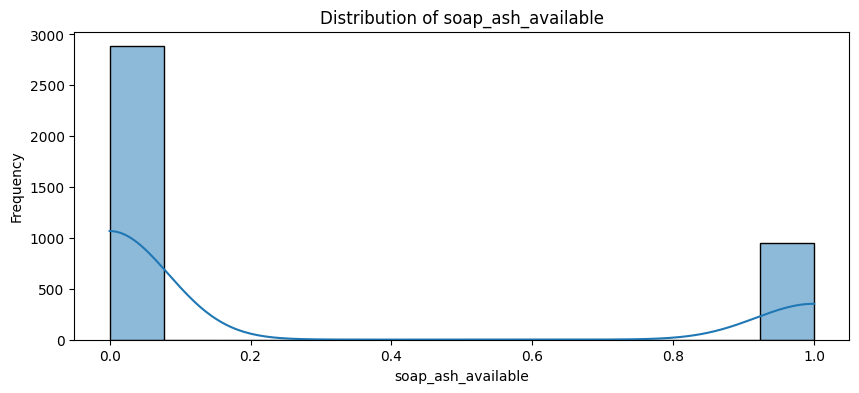

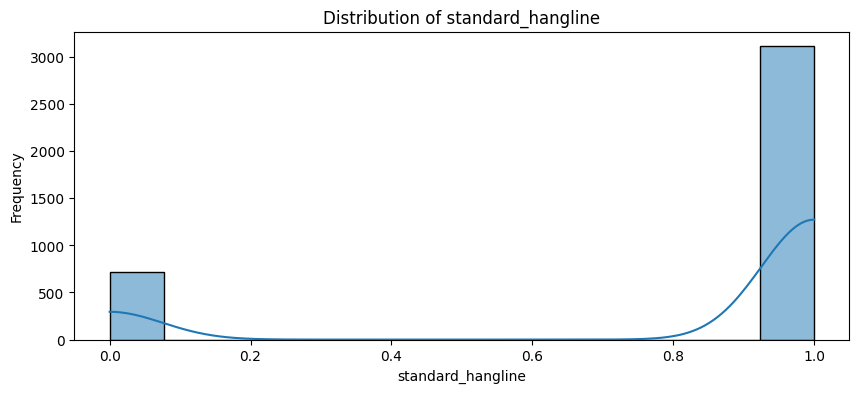

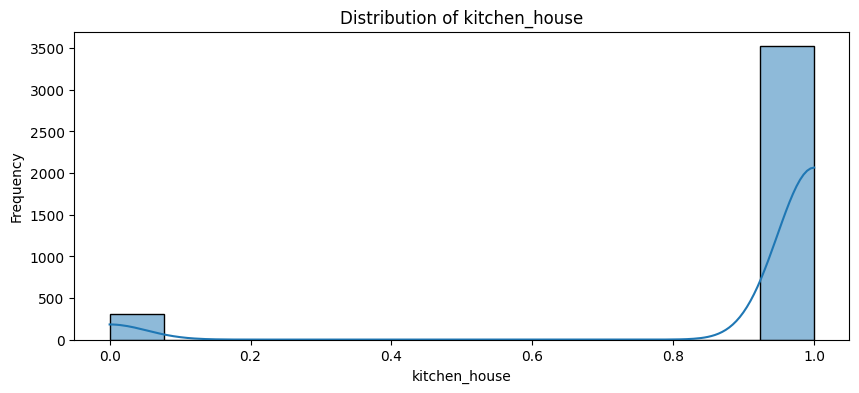

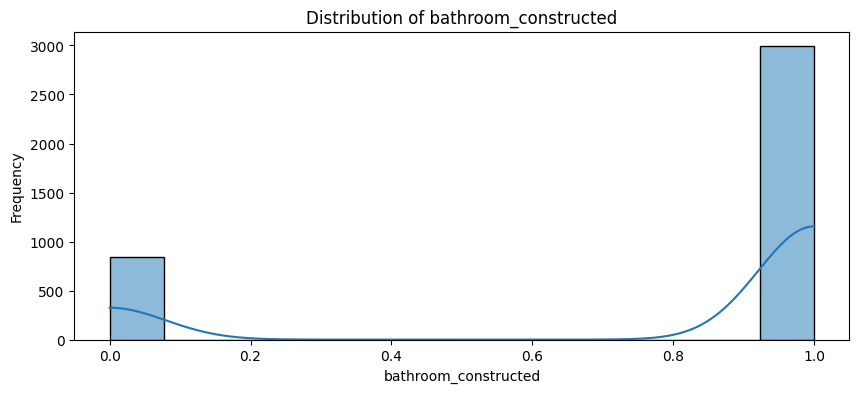

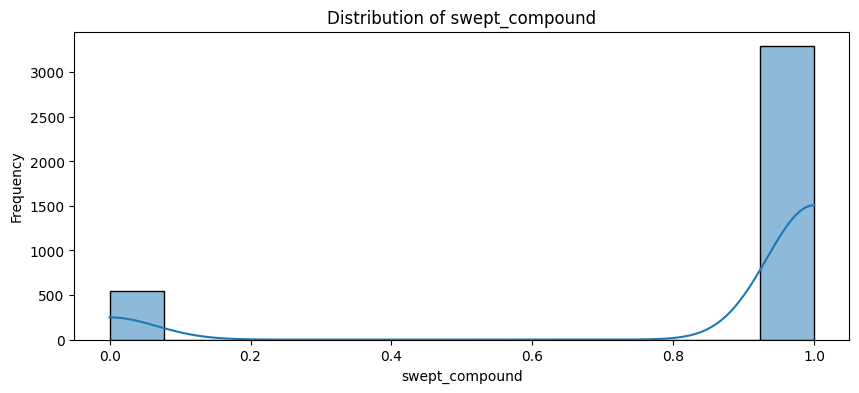

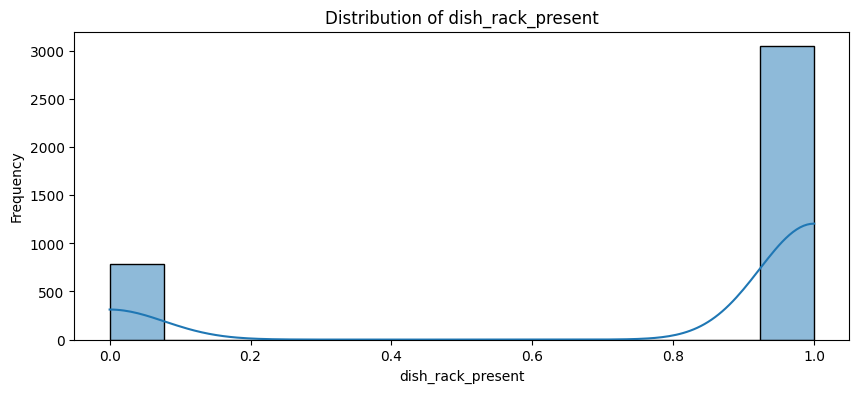

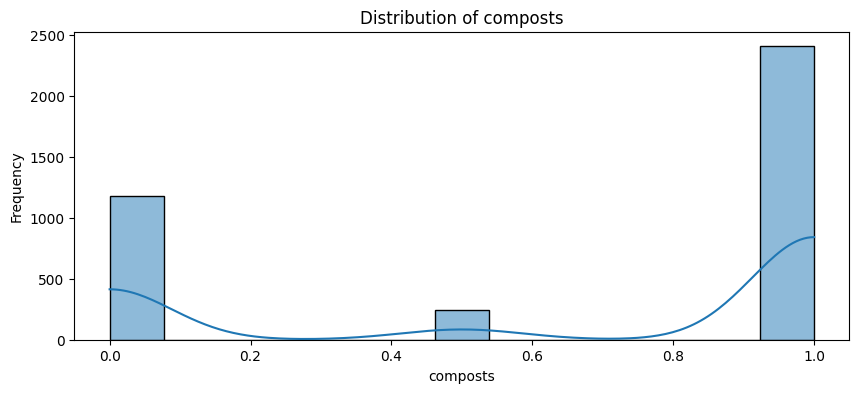

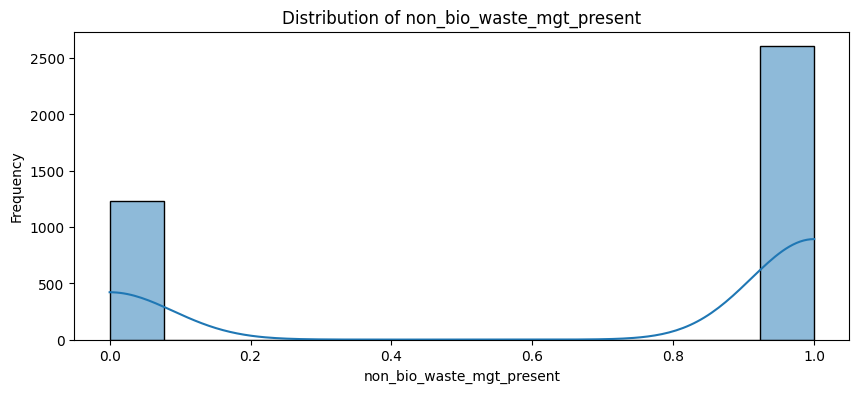

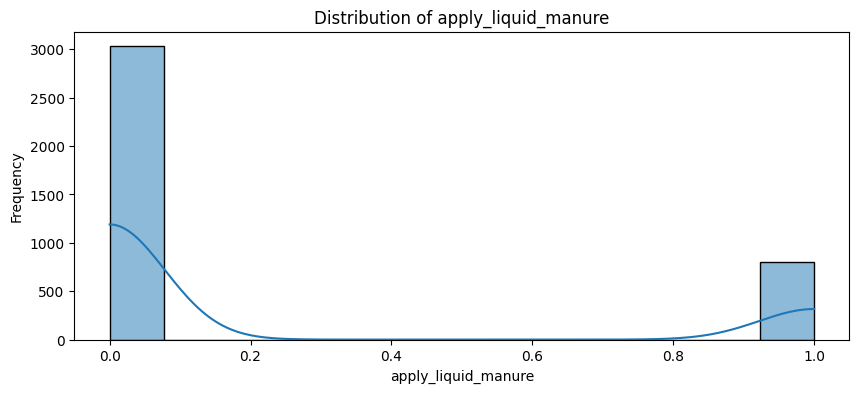

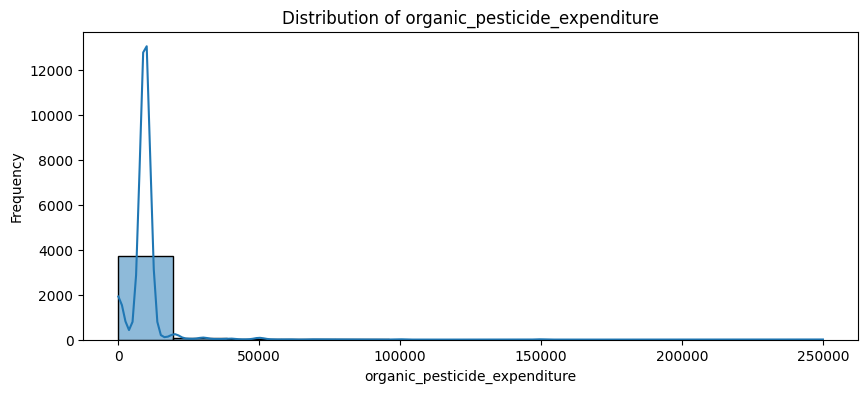

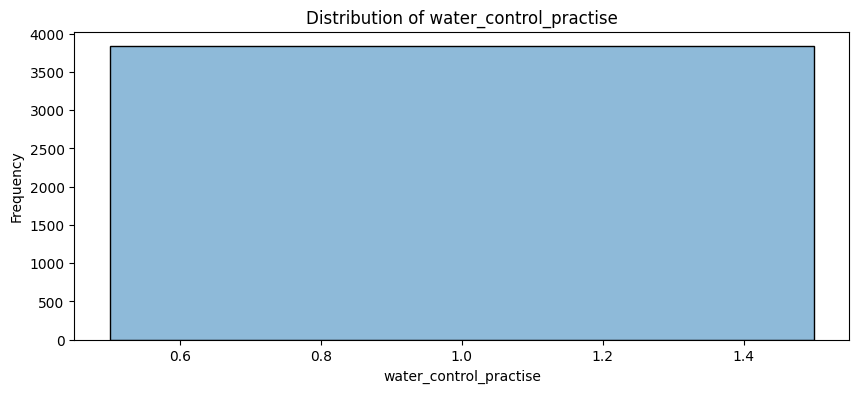

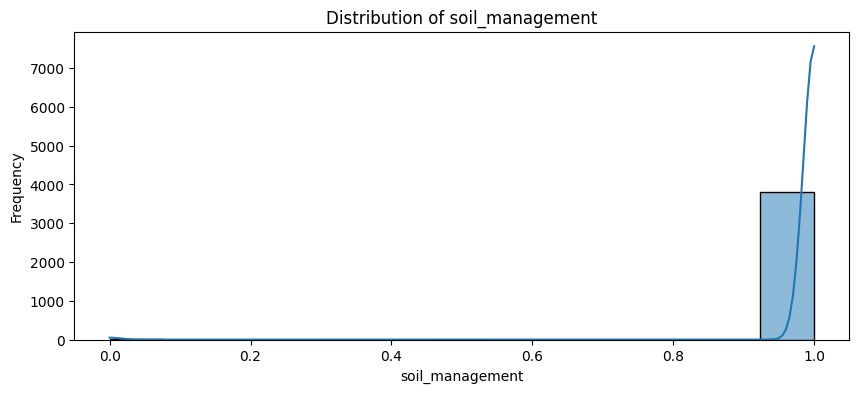

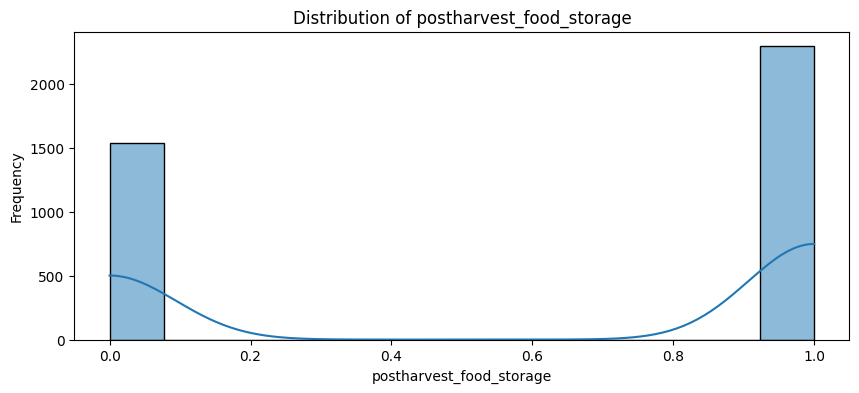

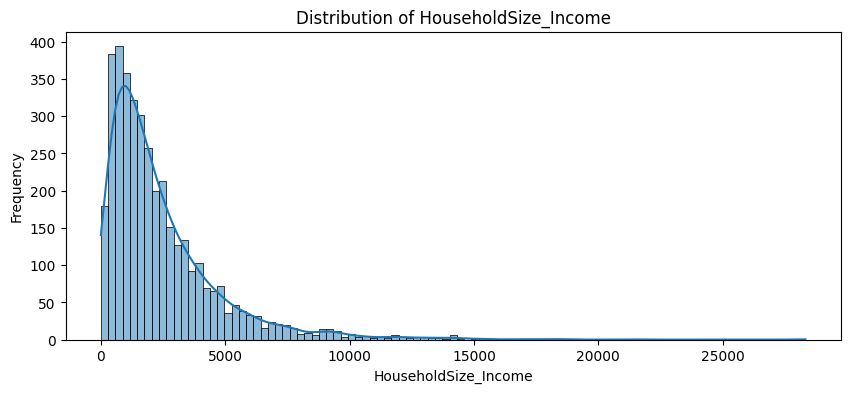

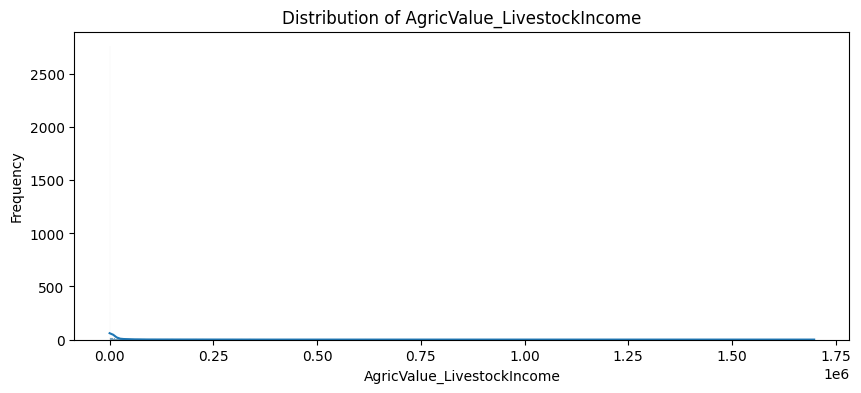

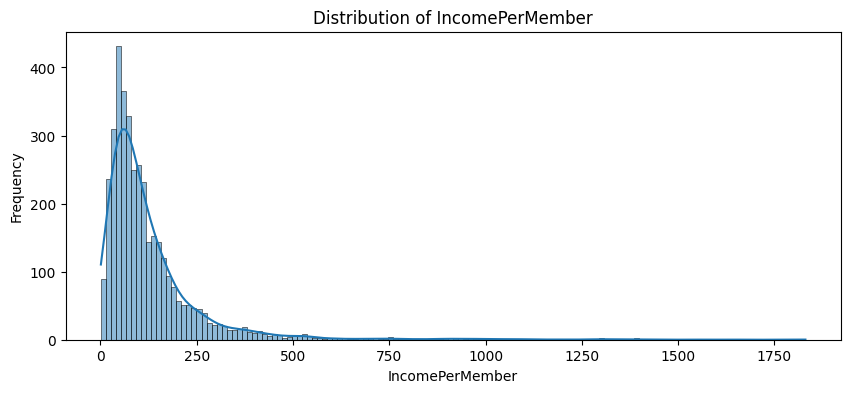

Text(0, 0.5, 'Frequency')

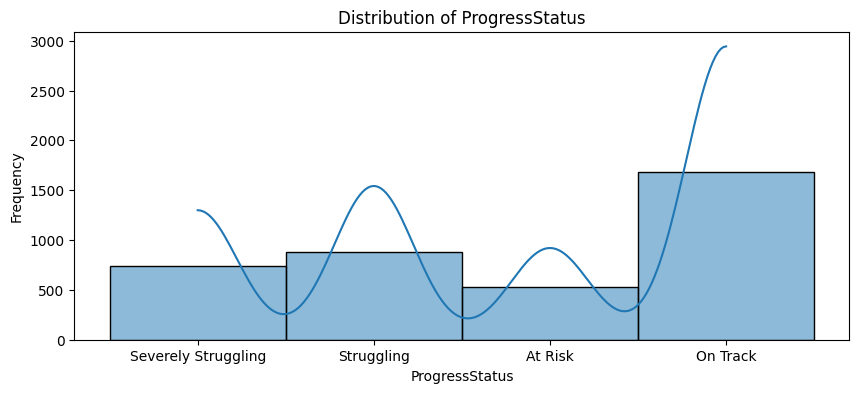

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot histogram for the target variable
plt.figure(figsize=(10, 4))
sns.histplot(y, kde=True)
plt.title('Distribution of ProgressStatus')
plt.xlabel('ProgressStatus')
plt.ylabel('Frequency')

In [77]:
def first_model(row):
    if row['HHIncome+Consumption+Residues/Day'] >= 2.15:
        return "On Track"
    elif row['HHIncome+Consumption+Residues/Day'] >= 1.77:
        return "At Risk"
    elif row['HHIncome+Consumption+Residues/Day'] >= 1.25:
        return "Struggling"
    else:
        return "Severely Struggling"

df['Rule_Based_Prediction'] = df.apply(first_model, axis=1)

# Evaluate the rule-based model (comparing with the 'ProgressStatus')
from sklearn.metrics import classification_report

print("Rule-Based Model Evaluation:")
print(classification_report(df['ProgressStatus'], df['Rule_Based_Prediction']))

Rule-Based Model Evaluation:
                     precision    recall  f1-score   support

            At Risk       1.00      1.00      1.00       535
           On Track       1.00      1.00      1.00      1704
Severely Struggling       1.00      1.00      1.00       757
         Struggling       1.00      1.00      1.00       901

           accuracy                           1.00      3897
          macro avg       1.00      1.00      1.00      3897
       weighted avg       1.00      1.00      1.00      3897



In [79]:
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred))

Logistic Regression Model Evaluation:
                     precision    recall  f1-score   support

            At Risk       0.24      0.49      0.32       110
           On Track       0.77      0.74      0.75       326
Severely Struggling       0.66      0.51      0.58       134
         Struggling       0.41      0.25      0.31       197

           accuracy                           0.54       767
          macro avg       0.52      0.50      0.49       767
       weighted avg       0.58      0.54      0.55       767



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


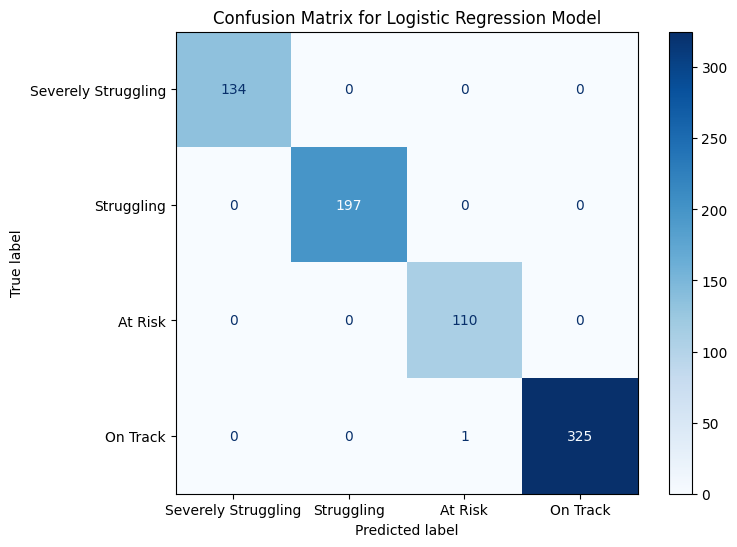

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["Severely Struggling", "Struggling", "At Risk", "On Track"])

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Severely Struggling", "Struggling", "At Risk", "On Track"])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size for better visibility
cmd.plot(ax=ax, cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

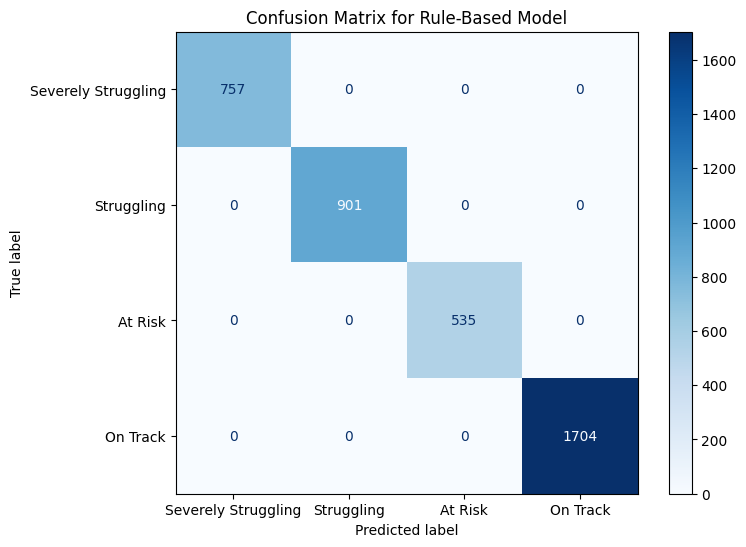

In [87]:
cm = confusion_matrix(df['ProgressStatus'], df['Rule_Based_Prediction'], labels=["Severely Struggling", "Struggling", "At Risk", "On Track"])

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Severely Struggling", "Struggling", "At Risk", "On Track"])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size for better visibility
cmd.plot(ax=ax, cmap="Blues")
plt.title('Confusion Matrix for Rule-Based Model')
plt.show()